In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src/')

from anna_code import merge_dataframes

plt.style.use('bmh')

In [7]:
ratings_df = pd.read_csv('../data/ml-latest-small/ratings.csv')
movies_df = pd.read_csv('../data/ml-latest-small/movies.csv')
tags_df = pd.read_csv('../data/ml-latest-small/tags.csv')
links_df = pd.read_csv('../data/ml-latest-small/links.csv')
df = merge_dataframes(ratings_df, movies_df)

In [55]:
def to_year(title):
    str_year = title.strip()[-5:-1]
    if not str.isnumeric(str_year):
        return -1
    return int(str_year)

df['year'] = df['title'].apply(to_year)
df

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,2017
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,2017
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,2017
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,2017


In [59]:
def make_decades(df):
    df = df.copy()
    eighties = df[(df['year'] >= 1980) & (df['year'] < 1990)]
    ninties = df[(df['year'] >= 1990) & (df['year'] < 2000)]
    aughts = df[(df['year'] >= 2000) & (df['year'] < 2010)]
    tens = df[df['year'] >= 2010]
    return eighties, ninties, aughts, tens

In [69]:
def get_top_titles(df):
    df = df.copy()
    a = df.groupby('title')['rating'].value_counts().reset_index(name='rating_count')
    a = a[a['rating_count'] >=5]
    a = a.sort_values(by=['rating', 'rating_count'], ascending=False)
    return a

In [61]:
eighties, ninties, aughts, tens = make_decades(df)

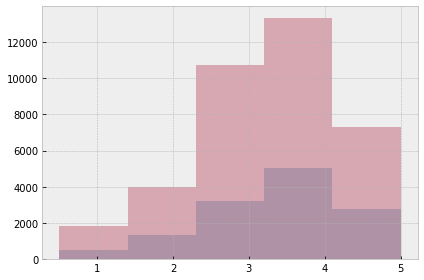

In [77]:
plt.hist(eighties['rating'], bins=5, label='Eighties', alpha=0.3)
plt.hist(ninties['rating'], bins=5, label='Ninties', alpha=0.3)
plt.tight_layout()
plt.show()

In [70]:
top_eighties = get_top_titles(eighties)
top_eighties.head()

,title,rating,rating_count
3223,Star Wars: Episode V - The Empire Strikes Back...,5.0,80
2741,Raiders of the Lost Ark (Indiana Jones and the...,5.0,69
3232,Star Wars: Episode VI - Return of the Jedi (1983),5.0,65
2658,"Princess Bride, The (1987)",5.0,55
300,Back to the Future (1985),5.0,49


In [49]:
a.sort_values(by=['rating_count', 'rating'], ascending=False)[:10]

,title,rating,rating_count
23890,"Shawshank Redemption, The (1994)",5.0,153
21516,Pulp Fiction (1994),5.0,123
9948,Forrest Gump (1994),5.0,116
17180,"Matrix, The (1999)",5.0,109
25347,Star Wars: Episode IV - A New Hope (1977),5.0,104
14564,Jurassic Park (1993),4.0,97
24178,"Silence of the Lambs, The (1991)",4.0,97
9949,Forrest Gump (1994),4.0,94
23318,Schindler's List (1993),5.0,92
24179,"Silence of the Lambs, The (1991)",5.0,92


In [10]:
df.sort_values(by=['rating', 'timestamp'], ascending=False)

,userId,movieId,rating,timestamp,title,genres
30174,210,177765,5.0,1537632257,Coco (2017),Adventure|Animation|Children
46600,305,148671,5.0,1537354985,Saw (2003),Crime|Horror
51318,331,57669,5.0,1537235356,In Bruges (2008),Comedy|Crime|Drama|Thriller
51314,331,55820,5.0,1537235354,No Country for Old Men (2007),Crime|Drama
51202,331,608,5.0,1537235353,Fargo (1996),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
73897,474,2796,0.5,1053021959,Funny Farm (1988),Comedy
74207,474,4040,0.5,1053021938,Don't Tell Mom the Babysitter's Dead (1991),Comedy
73540,474,1526,0.5,1053021910,Fathers' Day (1997),Comedy
74324,474,4676,0.5,1053021903,Troop Beverly Hills (1989),Comedy


In [ ]:
fig, ax = 